In [2]:
#importing all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
sensor = pd.read_csv('sensor0.csv')

In [4]:
sensor.drop(['Unnamed: 0','dt'],axis=1, inplace=True)

In [5]:
sensor.head()

,sensor,con,spl,date,time
0,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00
1,sensor_0,2748.28875,81.467436,2016-06-21,04:00:00
2,sensor_0,2720.35125,80.020600,2016-06-21,08:00:00
3,sensor_0,2443.72875,76.525876,2016-06-21,12:00:00
4,sensor_0,2717.49625,80.020600,2016-06-21,16:00:00


In [7]:
#sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
#sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [8]:
#sensor_con_date

In [9]:
weather = pd.read_csv('weather.csv')

In [11]:
weather.head()

,Time,Temp.,Humidity,Pressure,Day
0,0:00,72.500,70.00,29.8325,21-06-2016
1,4:00,76.225,62.50,29.7900,21-06-2016
2,8:00,82.475,34.25,29.8375,21-06-2016
3,12:00,85.725,35.50,29.8075,21-06-2016
4,16:00,80.525,56.25,29.7625,21-06-2016


In [12]:
weather['date']= sensor.date

In [21]:
sensor_weather = pd.merge(sensor, weather, on ='date')

In [23]:
sensor_weather.head()

,sensor,con,spl,date,time,Time,Temp.,Humidity,Pressure,Day
0,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,0:00,72.500,70.00,29.8325,21-06-2016
1,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,4:00,76.225,62.50,29.7900,21-06-2016
2,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,8:00,82.475,34.25,29.8375,21-06-2016
3,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,12:00,85.725,35.50,29.8075,21-06-2016
4,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,16:00,80.525,56.25,29.7625,21-06-2016


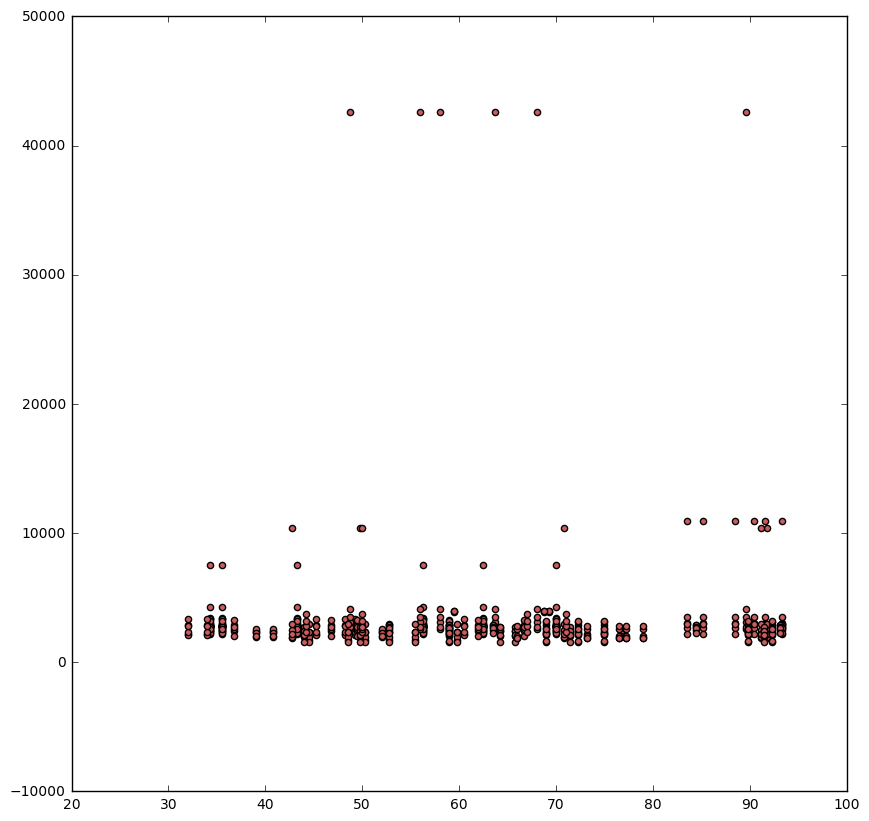

In [25]:
plt.figure(figsize= (10,10))
plt.scatter(sensor_weather['Humidity'],sensor_weather.con,c = 'IndianRed')
plt.show()

In [27]:
sensor_weather['Humidity_log'] = np.log(sensor_weather['Humidity'])
sensor_weather['con_log'] = np.log(sensor_weather.con)

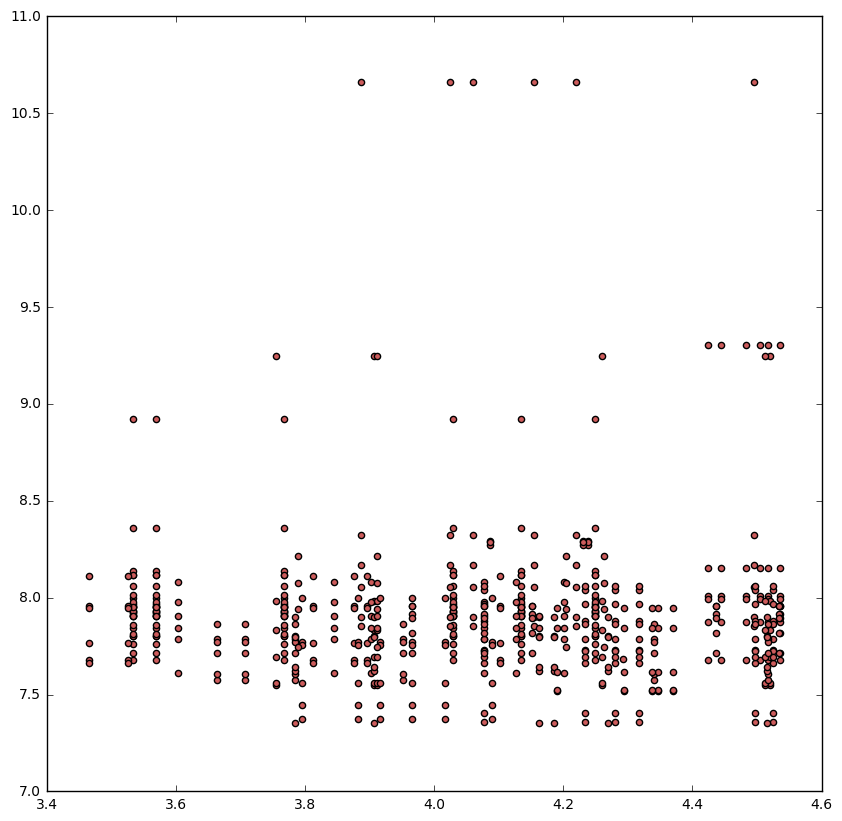

In [28]:
plt.figure(figsize= (10,10))
plt.scatter(sensor_weather['Humidity_log'],sensor_weather['con_log'],c = 'IndianRed')
plt.show()

In [31]:
lm = smf.ols(formula = 'con_log ~ Humidity_log', data = sensor_weather).fit()

In [37]:
print lm.params

Intercept       7.809044
Humidity_log    0.025903
dtype: float64


In [43]:
sensor_weather.head()

,sensor,con,spl,date,time,Time,Temp.,Humidity,Pressure,Day,Humidity_log,con_log
0,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,0:00,72.500,70.00,29.8325,21-06-2016,4.248495,7.949455
1,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,4:00,76.225,62.50,29.7900,21-06-2016,4.135167,7.949455
2,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,8:00,82.475,34.25,29.8375,21-06-2016,3.533687,7.949455
3,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,12:00,85.725,35.50,29.8075,21-06-2016,3.569533,7.949455
4,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00,16:00,80.525,56.25,29.7625,21-06-2016,4.029806,7.949455


In [45]:
plt.figure(figsize= (10,10)
plt.scatter(sensor_weather['Temp.'],sensor_weather['con'],c = 'IndianRed')
plt.show()

SyntaxError: invalid syntax (<ipython-input-45-1f6a538968ba>, line 2)